In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from Objective import *
from helper_function import *
from Kernel_helper import *
from Newton import *
from Barrier import *
from Barrier_SVM import *
from SMO_SVM import *



In [2]:
# Load the dataset (MNIST data)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [136]:
# We first classify number 0 and 1
first_label = 0
second_label = 1

N = 500 # number of data will be generated

# Generate the data (labelled with -1 and 1)
x, y = MNIST_ten_to_binary(x_train, y_train, x_test, y_test, first_label, second_label, N)

# Generate the test set
M = 100 # number of train set
test_x, test_y = MNIST_ten_to_binary(x_train, y_train, x_test, y_test, first_label, second_label, M)

In [137]:
alpha_0 = ((y==-1) * np.count_nonzero(y==1) + (y==1) * np.count_nonzero(y==-1))/10000
alpha_0 = alpha_0[np.newaxis]
alpha_0 = alpha_0.T
# alpha_0 = np.ones(len(y))[np.newaxis].T/100000
alpha_0.shape

(500, 1)

In [138]:
gamma = 0.0000001 # RBF hyperparameter
D = calc_D(x,y, gamma, "RBF")

In [145]:
C = 10000000 # controls the balance between the margin and empirical loss
F = f(alpha_0, D, C) # the objective function

In [146]:
# Line search hyperparameters
rho = 0.5
c = 1e-4 

epsilon = 1e-7

# Linear constraint matrix
A = y.reshape(-1,1)

newton = Centering_by_Newton(F, A.T, c, rho, epsilon)
alpha, hist = Barrier(F, newton, 10000, len(y), 4, 1e-8) # solve for $\alpha$

Iter 2: f* = [[-810617.47777197]]
Iter 3: f* = [[-3226150.08996296]]
Iter 4: f* = [[-12888280.53872693]]
Iter 5: f* = [[-51536802.33378278]]
Iter 6: f* = [[-2.0613089e+08]]
Iter 7: f* = [[-8.24507238e+08]]
Iter 8: f* = [[-3.29801263e+09]]
Iter 9: f* = [[-1.31920342e+10]]
Iter 10: f* = [[-5.27681205e+10]]
Iter 11: f* = [[-2.11072466e+11]]
Iter 12: f* = [[-8.44289847e+11]]
Iter 13: f* = [[-3.37715937e+12]]


In [147]:
barr_svm = Barrier_SVM_Classifier(alpha, D, x, y, gamma)
print('Training Accuracy of Binary SVM using Barrier method with RBF kernel =', barr_svm.accuracy(x, y))
print('Test Accuracy of Binary SVM using Barrier method with RBF kernel =', barr_svm.accuracy(test_x, test_y))

Training Accuracy of Binary SVM using Barrier method with RBF kernel = 0.994
Test Accuracy of Binary SVM using Barrier method with RBF kernel = 0.99


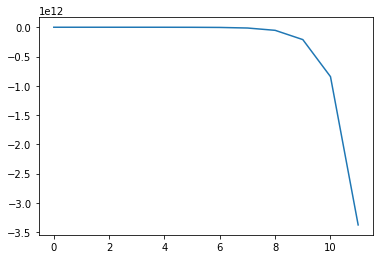

In [149]:
plt.plot(hist)

In [148]:
import SMO_SVM
import Objective
import Kernel_helper
reload(SMO_SVM)
reload(Objective)
reload(Kernel_helper)
from SMO_SVM import *
from Kernel_helper import *
from Objective import *

In [175]:
C = 10000000 # controls the balance between the margin and empirical loss

d = 1 # when kernel is Polynomial
gamma = 0.0000001 # RBF hyperparameter

# when kernel is RBF
max_passes = 2

kernel_set = ["Polynomial", "RBF"]

In [176]:
kernel_type = kernel_set[1] # Choose the kernel

if kernel_type == "Polynomial":
    kernel_hyperparameter = 1
elif kernel_type == "RBF":
    kernel_hyperparameter = 0.000001

In [163]:
D = calc_D(x, y, kernel_hyperparameter, kernel_type) # Calculate the matrix D

F = f(alpha_0, D, C) # the objective function

smo_svm = SMO_SVM_Classifier(F, x, y, kernel_hyperparameter, max_passes, C, kernel_type)

Iter 0: f* = [[0.]]
Iter 1: f* = [[0.]]
Iter 2: f* = [[0.]]
Iter 12: f* = [[-1.00028953]]
Iter 13: f* = [[-1.495151]]
Iter 15: f* = [[-1.495151]]
Iter 42: f* = [[-1.76373366]]
Iter 54: f* = [[-1.76373366]]
Iter 99: f* = [[-1.76373366]]
Iter 139: f* = [[-1.76373366]]
Iter 154: f* = [[-1.76373366]]
Iter 206: f* = [[-1.76373366]]
Iter 207: f* = [[-2.10540075]]
Iter 208: f* = [[-2.10540075]]
Iter 210: f* = [[-2.10540075]]
Iter 235: f* = [[-1.69293705]]
Iter 278: f* = [[-1.69293705]]
Iter 279: f* = [[-2.59244378]]
Iter 329: f* = [[-2.77888872]]
Iter 420: f* = [[-2.77888872]]
Iter 486: f* = [[-2.77888872]]
Iter 489: f* = [[-3.53797518]]
Iter 491: f* = [[-3.53797518]]
Iter 493: f* = [[-3.53797518]]
Iter 494: f* = [[-3.53797518]]
Iter 235: f* = [[-3.59604414]]
Iter 236: f* = [[-4.24729144]]
Iter 237: f* = [[-4.24729144]]
-2.220446049250313e-16


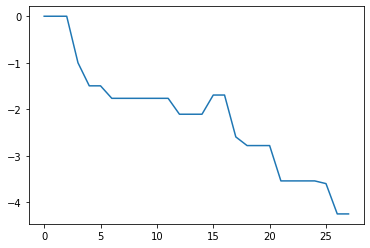

In [173]:
# RBF kernel with SMO
smo_svm.train()
smo_svm.plot_objective_value()

In [174]:
# RBF
print('Training Accuracy of Binary SVM using simplified SMO method with RBF kernel =', smo_svm.accuracy(x, y))
print('Test Accuracy of Binary SVM using simplfied SMO method with RBF kernel =', smo_svm.accuracy(test_x, test_y))

Training Accuracy of Binary SVM using simplified SMO method with RBF kernel = 1.0
Test Accuracy of Binary SVM using simplfied SMO method with RBF kernel = 0.98
